In [1]:
                 import numpy   as np                 
                 import pandas  as pd
                 import seaborn as sns
                 import os
                 import warnings
from matplotlib  import pyplot  as plt
from itertools   import combinations
from collections import Counter
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

### Merging 12 months of sales data into a single CSV file

In [2]:
all_months = [f for f in os.listdir('./Sales_Data')]

new_df = pd.DataFrame()

for file in all_months:
    df = pd.read_csv('./Sales_Data/'+file)
    new_df = pd.concat([new_df, df])

# Saving the merged df 
new_df.to_csv('df.csv', index=False)
df = pd.read_csv('df.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning up the data

In [3]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [4]:
df.shape

(186850, 6)

In [5]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Since there is 545 rows with only NaN, we can just drop them

df = df.dropna()
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
df.shape

(186305, 6)

In [8]:
# We are still getting some duplicate rows, let's drop them

df = df[df['Product'] != 'Product']
df.shape

(185950, 6)

### Adding useful columns

In [9]:
### Adding Month Column

df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype(int)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
### Adding Sales Column
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### What was the best month for sales in 2019?

In [11]:
# As we can see, December was by far the best month for sales, with approximately U$4.613.000.
# Meanwhile, January was the worst month for sales, with approximately U$1.822.000.

sales_per_month = df.groupby('Month').sum()
sales_per_month

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Let's plot to get a better visualization

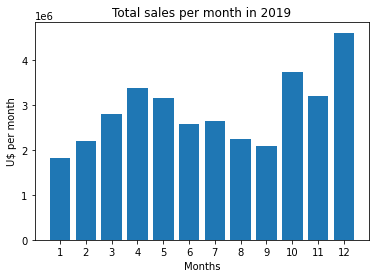

In [12]:
months = range(1,13)
plt.bar(months, sales_per_month['Sales'])
plt.ylabel('U$ per month')
plt.xlabel('Months')
plt.title('Total sales per month in 2019')
plt.xticks(months)
plt.show()

In [13]:
### We can get a few insights from this plot. Is December sales so high because of Christmas?
### There is correlation between local peaks in April (Easter) and October (Halloween)?
### Is it really smart to spend advertising money in January since it's the worst sales month?

### What US city had the highest number of sales?

In [14]:
### Since there is cities with the same name but from different states, let's solve this first
def city(x):
    return x.split(',')[1]
def state(y):
    return y.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda z: city(z) + ' ' + state(z))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [15]:
cities = df.groupby('City').sum()
cities

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


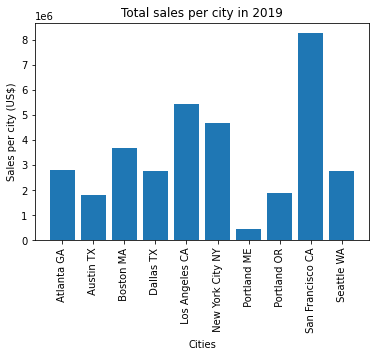

In [16]:
cities1 = [city for city, df in df.groupby('City')]

plt.bar(cities1, cities['Sales'])
plt.ylabel('Sales per city (US$)')
plt.xlabel('Cities')
plt.title('Total sales per city in 2019')
plt.xticks(cities1, rotation=90)
plt.show()

In [17]:
### San Francisco is by far the city with the highest sales numbers. 
### As it is an electronics store, perhaps it is because Silicon Valley demands more electronics than other cities.
### Or maybe people are richer in San Francisco than in other cities.
### Meanwhile, Portland ME has very little sales value. We can assume that it is better to concentrate resources in other cities.

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df.groupby('Hour').sum()['Sales'].sort_values(ascending=False)

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Sales, dtype: float64

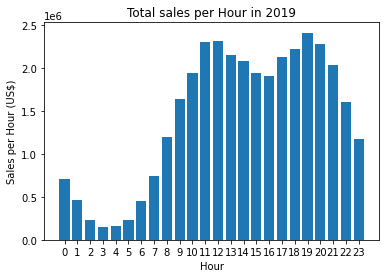

In [19]:
sales_per_hour = df.groupby('Hour').sum()

hora = [h for h, df in df.groupby('Hour')]

plt.bar(hora, sales_per_hour['Sales'])
plt.ylabel('Sales per Hour (US$)')
plt.xlabel('Hour')
plt.title('Total sales per Hour in 2019')
plt.xticks(hora)
plt.show()

In [20]:
### It seems that at 7 pm is the best time to invest in advertising, followed by 11 am and 12 pm.
### It doesn't seem like a good idea to place advertising at 3 am and 4 am.

### What product sold the most?

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [22]:
df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False)

# Most ordered products

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

In [23]:
df.groupby('Product').sum()['Sales'].sort_values(ascending=False)

# Products with higher gross profit

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Sales, dtype: float64

In [24]:
### Seems like AAA Batteries are the most sold product, but also are the most cheap product.
### Let's plot it.

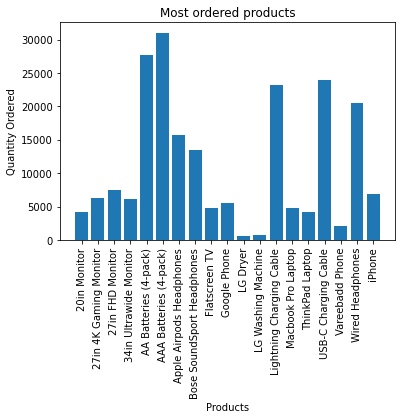

In [25]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

produtos = [product for product, df in product_group]

plt.bar(produtos, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.title('Most ordered products')
plt.xticks(produtos, rotation=90)
plt.show()

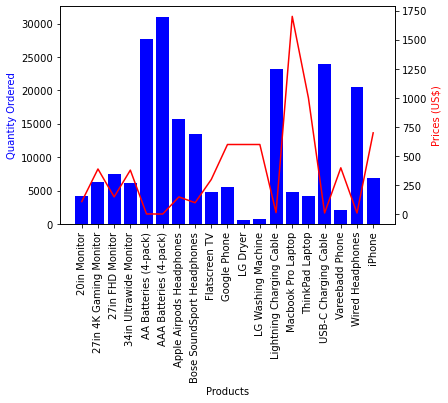

In [26]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(produtos, quantity_ordered, color='b')
ax2.plot(produtos, prices, 'r-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Prices (US$)', color='r')
ax1.set_xticklabels(produtos, rotation=90)

plt.show()

In [27]:
### As we can see, although the batteries sold more quantities, Macbook and ThinkPad generated higher gross income despite selling less.
### Furthermore, it appears that there is a negative correlation between quantity ordered and price.

### What products are most often sold together? 

In [28]:
ddf = df[df['Order ID'].duplicated(keep=False)]

ddf['Sold Together'] = ddf.groupby('Order ID')['Product'].transform(lambda x: (', ').join(x))

ddf = ddf[['Order ID', 'Sold Together']].drop_duplicates()

ddf.head()

,Order ID,Sold Together
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [29]:
count = Counter()

for row in ddf['Sold Together']:
    count.update(Counter(combinations(row.split(', '), 2)))
    
count.most_common(15)

### The two products that are commonly sold together

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58)]

In [30]:
count = Counter()

for row in ddf['Sold Together']:
    count.update(Counter(combinations(row.split(', '), 3)))
    
count.most_common(15)

### The three products that are commonly sold together

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5),
 (('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'),
  4),
 (('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'), 3),
 (('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'), 3),
 (('iPhone', 'Light

### ABC Analysis I

In [31]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [32]:
def ABC_segmentation(perc):
    '''
    Creates the 3 classes A, B, and C based 
    on quantity percentages (A-60%, B-25%, C-15%)
    '''
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [33]:
data_sub = df[['Order ID','Product','Price Each','Quantity Ordered', 'Sales']]
# order by cumulative cost
data_sub = data_sub.sort_values(by=['Sales'], ascending=False)
# create the column of the running CumCost of the cumulative cost per SKU
data_sub['RunCumCost'] = data_sub['Sales'].cumsum()
# create the column of the total sum
data_sub['TotSum'] = data_sub['Sales'].sum()
# create the column of the running percentage
data_sub['RunPerc'] =  data_sub['RunCumCost']/data_sub['TotSum']
# create the column of the class
data_sub['Class'] = data_sub['RunPerc'].apply(ABC_segmentation)

data_sub

,Order ID,Product,Price Each,Quantity Ordered,Sales,RunCumCost,TotSum,RunPerc,Class
127265,200528,Macbook Pro Laptop,1700.00,2,3400.00,3.400000e+03,34492035.97,0.000099,A
92026,210292,Macbook Pro Laptop,1700.00,2,3400.00,6.800000e+03,34492035.97,0.000197,A
4717,181069,Macbook Pro Laptop,1700.00,2,3400.00,1.020000e+04,34492035.97,0.000296,A
5219,181544,Macbook Pro Laptop,1700.00,2,3400.00,1.360000e+04,34492035.97,0.000394,A
174998,278637,ThinkPad Laptop,999.99,2,1999.98,1.559998e+04,34492035.97,0.000452,A
...,...,...,...,...,...,...,...,...,...
161398,265671,AAA Batteries (4-pack),2.99,1,2.99,3.449202e+07,34492035.97,1.000000,C
61684,156382,AAA Batteries (4-pack),2.99,1,2.99,3.449203e+07,34492035.97,1.000000,C
61687,156385,AAA Batteries (4-pack),2.99,1,2.99,3.449203e+07,34492035.97,1.000000,C
61689,156387,AAA Batteries (4-pack),2.99,1,2.99,3.449203e+07,34492035.97,1.000000,C


In [34]:
data_sub.Class.value_counts()

C    136447
B     27604
A     21899
Name: Class, dtype: int64

In [35]:
# Total cost per class
print ('Cost of Class A :{:.2f}'.format(data_sub[data_sub.Class == 'A']['Sales'].sum()))
print ('Cost of Class B :{:.2f}'.format(data_sub[data_sub.Class == 'B']['Sales'].sum()))
print ('Cost of Class C :{:.2f}'.format(data_sub[data_sub.Class == 'C']['Sales'].sum()))

Cost of Class A :20695058.06
Cost of Class B :8623062.17
Cost of Class C :5173915.74


In [36]:
# percent of total cost per class
print ('Percent of Cost of Class A :', data_sub[data_sub.Class == 'A']['Sales'].sum()/data_sub['Sales'].sum())
print ('Percent of Cost of Class B :', data_sub[data_sub.Class == 'B']['Sales'].sum()/data_sub['Sales'].sum())
print ('Percent of Cost of Class C :', data_sub[data_sub.Class == 'C']['Sales'].sum()/data_sub['Sales'].sum())

Percent of Cost of Class A : 0.5999952591374966
Percent of Cost of Class B : 0.2500015417327074
Percent of Cost of Class C : 0.1500031991297962


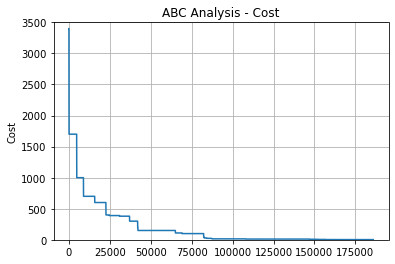

In [37]:
performance = data_sub['Sales'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Cost')
plt.title('ABC Analysis - Cost')
plt.grid(True)
plt.ylim((0,3500))
plt.show()

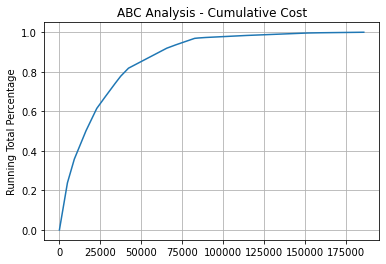

In [38]:
performance = data_sub['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Cost')
plt.grid(True)
plt.show()

### ABC Analysis II - Clustering

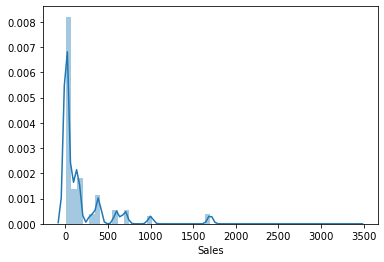

In [39]:
sns.distplot(df['Sales'])
plt.show()

In [40]:
def bins(x):
    for bar in range(70, 3500, 70):
        if x <= bar:
            return bar
# Create new column to apply the bin function
df["rev_dist"] = df["Sales"].apply(lambda x: bins(x))

In [41]:
df["count"] = 1
# Create a pivot table of the revenue distributions
pivot_table = pd.pivot_table(df, index = ["rev_dist"], values = ["count"], aggfunc = np.sum)

In [42]:
# K -clusters is equal to 3 because things will be sorted into A, B, and C
kmeans = KMeans(n_clusters=3)
kmeans.fit(pivot_table)

KMeans(n_clusters=3)

In [43]:
pivot_table["category"] = kmeans.labels_

In [44]:
ABC_dict = {    
    0: "A",
    1: "C",
    2: "B"
}
pivot_table["ABC"] = pivot_table["category"].apply(lambda x: ABC_dict[x])

In [45]:
df = pd.merge(df, pivot_table, on = "rev_dist", how ="left")

In [46]:
df.shape

(185950, 15)

In [47]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,rev_dist,count_x,count_y,category,ABC
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,70,1,103660,1,C
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,140,1,17269,2,B
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,630,1,6849,0,A
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,70,1,103660,1,C
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,70,1,103660,1,C


In [48]:
a_df = df[df['ABC'] == 'A']
a_df.shape

(27550, 15)

In [49]:
b_df = df[df['ABC'] == 'B']
b_df.shape

(54740, 15)

In [50]:
c_df = df[df['ABC'] == 'C']
c_df.shape

(103660, 15)